## Problem 1: EU Cities Temperatures Dataset (55 points)
### Given a CSV data file as represented by the sample file EuCitiesTemperatures.csv (213 records), load it into a Pandas DataFrame and perform the following tasks on it.




In [22]:
import pandas as pd
from matplotlib import pyplot as plt
german_credit_df = pd.read_csv('GermanCredit.csv')
#german_credit_df

## Preprocessing (31 pts)

#### [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)


In [2]:
def drop_n_least_sig_columns(df,n):
    # drop n least significant columns
    column_none_counts = (df=='none').sum()
    column_none_counts = column_none_counts.sort_values(ascending=False)
    drop_columns = column_none_counts.index[:n]
    df.drop(columns = drop_columns,inplace=True)

In [3]:
column_none_counts = (german_credit_df=='none').sum()
column_none_counts = column_none_counts.sort_values(ascending=False)
column_none_counts

other_parties             907
other_payment_plans       814
own_telephone             596
checking_status             0
property_magnitude          0
foreign_worker              0
num_dependents              0
job                         0
existing_credits            0
housing                     0
age                         0
residence_since             0
duration                    0
personal_status             0
installment_commitment      0
employment                  0
savings_status              0
credit_amount               0
purpose                     0
credit_history              0
class                       0
dtype: int64

In [4]:
drop_n_least_sig_columns(german_credit_df,3)

#### [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.


In [5]:
for col in german_credit_df.columns:
    if german_credit_df[col].dtype=='object':
        german_credit_df[col] = german_credit_df[col].str.replace("'", "")

In [6]:
#german_credit_df
german_credit_df['checking_status'].value_counts()


checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64

#### [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.


In [7]:
german_credit_df['checking_status'].value_counts()
checking_status_map = {'no checking':'No Checking','<0':'Low', '0<=X<200': 'Medium',  '>=200': 'High'}
german_credit_df['checking_status'] = german_credit_df['checking_status'].map(checking_status_map)

    # '>=200'

In [8]:
#german_credit_df['checking_status'].value_counts()
german_credit_df['savings_status'].value_counts()


savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64

#### [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').


In [9]:
german_credit_df['savings_status'].value_counts()
checking_status_map = {'no known savings':'No Savings','<100':'Low', '100<=X<500': 'Medium',  '500<=X<1000': 'High','>=1000': 'High'}
german_credit_df['savings_status'] = german_credit_df['savings_status'].map(checking_status_map)

In [10]:
german_credit_df['savings_status'].value_counts()

savings_status
Low           603
No Savings    183
High          111
Medium        103
Name: count, dtype: int64

#### [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.


In [11]:
german_credit_df['class'].replace({'good': 1, 'bad': 0}, inplace=True)

In [12]:
german_credit_df['class']
german_credit_df['employment'].value_counts()

employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64

#### [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.


In [13]:
# unemployed, <1, 1<.=x<4, 4<=x<7, >=7
employment_map = {'unemployed':'Unemployed','<1':'Amateur', '1<=X<4': 'Professional',  '4<=X<7': 'Experienced','>=7': 'Expert'}
german_credit_df['employment'] = german_credit_df['employment'].map(employment_map)

#german_credit_df['savings_status']
german_credit_df['employment'].value_counts()

# Analysis (17 pts)
### For the following tasks, do preprocessing or changing of data types in the data frame as required.




#### [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

##### 1a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [14]:
pd.crosstab(index=[german_credit_df['foreign_worker'],['class']],columns=german_credit_df['class'])

,class,0,1
foreign_worker,row_1,,
no,class,4,33
yes,class,296,667


##### 1b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.


In [15]:
pd.crosstab(index=[german_credit_df['savings_status'],['employment']],columns=german_credit_df['employment'])

,employment,Amateur,Experienced,Expert,Professional,Unemployed
savings_status,row_1,,,,,
High,employment,12,18,34,44,3
Low,employment,120,100,133,210,40
Medium,employment,17,24,22,33,7
No Savings,employment,23,32,64,52,12


#### [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.


In [16]:
german_credit_df[(german_credit_df['personal_status'] == 'male single') & (german_credit_df['employment'] == 'Experienced')]['credit_amount'].mean()

4142.592592592592

#### [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.


In [17]:
german_credit_df.groupby('job')['duration'].mean()


job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

#### [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:


In [18]:
# 'Most common checking status:' ...
# Most common savings status: ...
education_purpose = german_credit_df[german_credit_df['purpose']=='education']

print('Most common checking status: ' + education_purpose['checking_status'].mode()[0])
print('Most common savings status: ' + education_purpose['savings_status'].mode()[0])


Most common checking status: No Checking
Most common savings status: Low


#### Visualization (24 pts)
##### [9 pts] Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


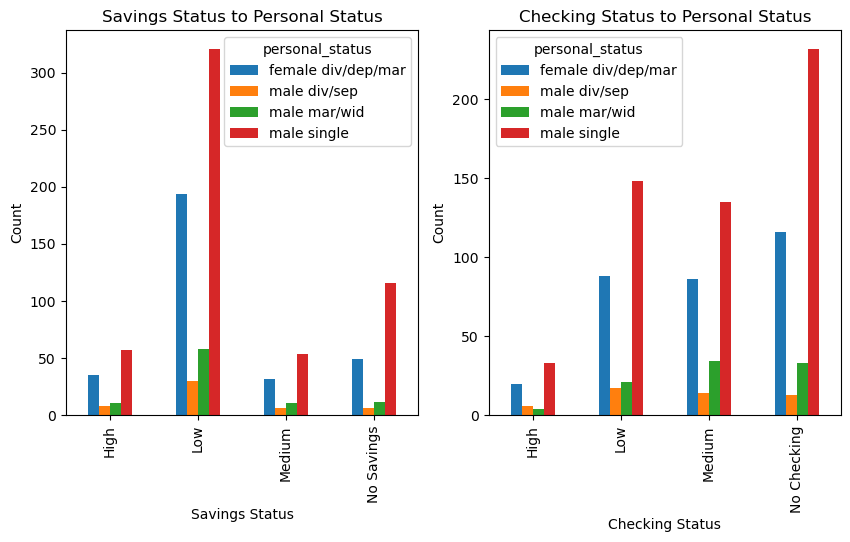

In [19]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
savings_status_to_personal_status= german_credit_df.groupby(['savings_status', 'personal_status']).size().unstack()
savings_status_to_personal_status
savings_status_to_personal_status.plot(kind='bar', stacked=False, ax=ax[0])
ax[0].set_title('Savings Status to Personal Status')
ax[0].set_xlabel('Savings Status')
ax[0].set_ylabel('Count')

checking_status_to_personal_status = german_credit_df.groupby(['checking_status', 'personal_status']).size().unstack()
checking_status_to_personal_status
checking_status_to_personal_status.plot(kind='bar', stacked=False, ax=ax[1])
ax[1].set_title('Checking Status to Personal Status')
ax[1].set_xlabel('Checking Status')
ax[1].set_ylabel('Count')

german_credit_df.head()

#### [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).


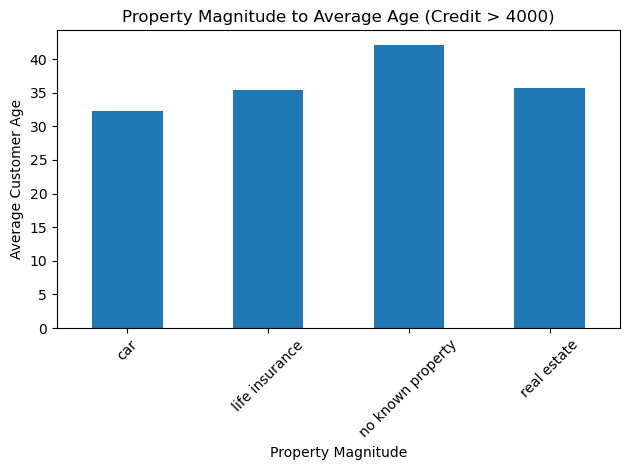

In [20]:
credit_over_4000_df = german_credit_df[german_credit_df['credit_amount'] > 4000]

avg_age_to_magnitude = credit_over_4000_df.groupby('property_magnitude')['age'].mean()

avg_age_to_magnitude.plot(kind='bar')
plt.xlabel('Property Magnitude')
plt.ylabel('Average Customer Age')
plt.title('Property Magnitude to Average Age (Credit > 4000)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
#### Personal status
#### Credit history
#### Job


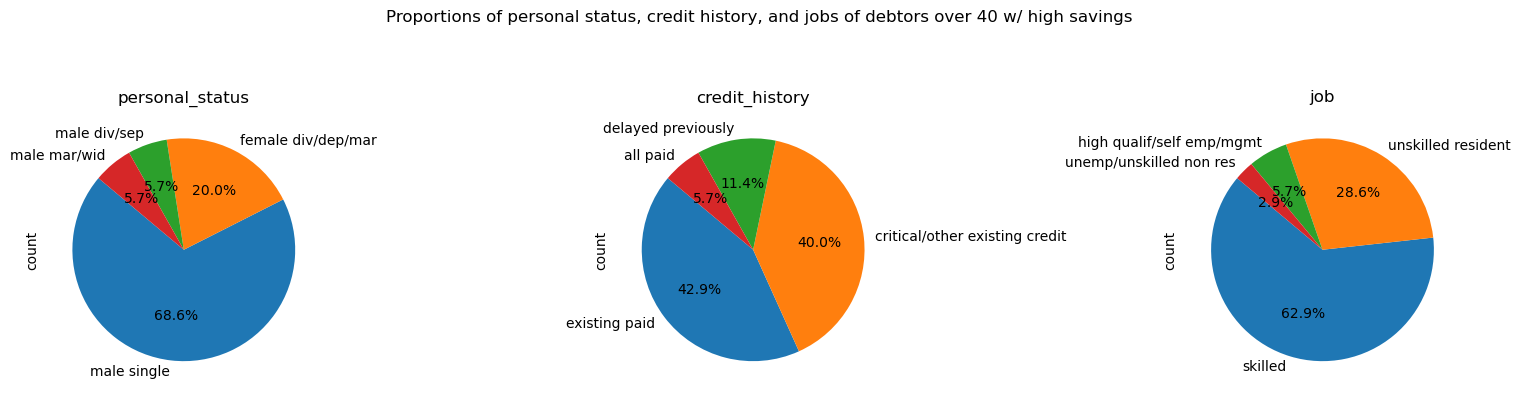

In [21]:
high_saving_and_over_40_df = german_credit_df[(german_credit_df['savings_status'] == 'High') & (german_credit_df['age'] > 40)]
categories = ['personal_status', 'credit_history', 'job']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(3):
    group_counts = high_saving_and_over_40_df[categories[i]].value_counts()
    
    group_counts.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=140)
    
    axes[i].set_title(categories[i])

plt.tight_layout()
fig.suptitle('Proportions of personal status, credit history, and jobs of debtors over 40 w/ high savings')
plt.show()